In [1]:
import os
import sys
import pandas as pd
import networkx
from networkx import draw, Graph

In [2]:
from pyjedai.utils import (
    text_cleaning_method,
    print_clusters,
    print_blocks,
    print_candidate_pairs
)
from pyjedai.evaluation import Evaluation, write

In [3]:
d1 = pd.read_csv("acmProfiles.csv", sep=',')
d2 = pd.read_csv("dblpProfiles.csv", sep=',')
gt = pd.read_csv("dblpAcmGT.csv", sep=',', engine='python')

In [4]:
d1

id                                            authors    year   
0        0                    Gottfried Vossen, Mathias Weske  1999.0  \
1        1                  Isabel F. Cruz, Kimberly M. James  1999.0   
2        2  Athman Bouguettaya, Boualem Benatallah, Lily H...  1999.0   
3        3  Chaitan Baru, Amarnath Gupta, Bertram Lud&#228...  1999.0   
4        4  Alexander Brodsky, Victor E. Segal, Jia Chen, ...  1999.0   
...    ...                                                ...     ...   
2289  2289                     Alfons Kemper, Donald Kossmann  1994.0   
2290  2290  Philip A. Bernstein, Yannis Ioannidis, Raghu R...  2003.0   
2291  2291                           Ralf Hartmut G&#252;ting  1994.0   
2292  2292                              Alexander A. Anisimov  2003.0   
2293  2293               Janet L. Wiener, Jeffrey F. Naughton  1994.0   

                                                  title   
0     The WASA2 object-oriented workflow management ...  \
1     A user-centered interface for querying distrib...   
2     World Wide Database-integrating the Web, CORBA...   
3              XML-based information mediation with MIX   
4     The CCUBE constraint object-oriented database ...   
...                                                 ...   
2289          Dual-Buffering Strategies in Object Bases   
2290                                    Guest editorial   
2291  GraphDB: Modeling and Querying Graphs in Datab...   
2292  Review of The data warehouse toolkit: the comp...   
2293     Bulk Loading into an OODB: A Performance Study   

                                                  venue  
0        International Conference on Management of Data  
1        International Conference on Management of Data  
2        International Conference on Management of Data  
3        International Conference on Management of Data  
4        International Conference on Management of Data  
...                                                 ...  
2289                              Very Large Data Bases  
2290  The VLDB Journal &mdash; The International Jou...  
2291                              Very Large Data Bases  
2292                                  ACM SIGMOD Record  
2293                              Very Large Data Bases  

[2294 rows x 5 columns]

In [5]:
d1.isna().sum()

id          0
authors     0
year       14
title       0
venue       0
dtype: int64

In [6]:
sample = d1[d1['year'].isna()]
sample

id                                            authors  year   
884    884                             "Very Large Data Bases   NaN  \
1146  1146                             "Very Large Data Bases   NaN   
2128  2128                                 "ACM SIGMOD Record   NaN   
2129  2129                                 "ACM SIGMOD Record   NaN   
2130  2130                                 "ACM SIGMOD Record   NaN   
2131  2131                                 "ACM SIGMOD Record   NaN   
2132  2132                                 "ACM SIGMOD Record   NaN   
2133  2133                                 "ACM SIGMOD Record   NaN   
2134  2134                                 "ACM SIGMOD Record   NaN   
2136  2136                             "Very Large Data Bases   NaN   
2139  2139                             "Very Large Data Bases   NaN   
2145  2145  "The VLDB Journal &mdash; The International Jo...   NaN   
2148  2148                                 "ACM SIGMOD Record   NaN   
2150  2150                                 "ACM SIGMOD Record   NaN   

                                                  title venue  
884   High-Performance and Scalability through Appli...  2000  
1146  MineSet(tm): A System for High-End Data Mining...  1996  
2128                                Database principles  2003  
2129                                       Book reviews  2003  
2130                                            Reports  2003  
2131  Special topic section on peer to peer data man...  2003  
2132                                          Standards  2003  
2133                                       Book reviews  2003  
2134  Special section on sensor network technology a...  2003  
2136                                       Author Index  2000  
2139  Ordering Information, Conference Organizers, P...  2000  
2145         Special issue on persistent object systems  1995  
2148                             Systems and prototypes  2001  
2150    Special section on advanced XML data processing  2001

In [7]:
d1.loc[d1['year'].isna(), 'venue'] = sample['authors']
d1.loc[d1['year'].isna(), 'year'] = sample['venue']

In [8]:
d1.isna().sum()

id         0
authors    0
year       0
title      0
venue      0
dtype: int64

In [9]:
d1 = d1.astype(str)
d2 = d2.astype(str)

In [10]:
d2

id                                            authors  year   
0        0                                    D. Scott Mackay  1999  \
1        1             Viswanath Poosala, Yannis E. Ioannidis  1996   
2        2  Themistoklis Palpanas, Richard Sidle, Hamid Pi...  2002   
3        3  Zhao-Hui Tang, Georges Gardarin, Jean-Robert G...  1996   
4        4                          Erik G. Hoel, Hanan Samet  1995   
...    ...                                                ...   ...   
2611  2611  Scott Shenker, Christos H. Papadimitriou, Rich...  2003   
2612  2612        Lipyeow Lim, Min Wang, Jeffrey Scott Vitter  2003   
2613  2613  Kaushik Chakrabarti, Eamonn J. Keogh, Michael ...  2002   
2614  2614                               Richard T. Snodgrass  2001   
2615  2615                          Bongki Moon, Quanzhong Li  2001   

                                                  title   
0     Semantic Integration of Environmental Models f...  \
1     Estimation of Query-Result Distribution and it...   
2     Incremental Maintenance for Non-Distributive A...   
3     Cost-based Selection of Path Expression Proces...   
4     Benchmarking Spatial Join Operations with Spat...   
...                                                 ...   
2611  A simple algorithm for finding frequent elemen...   
2612  SASH: A Self-Adaptive Histogram Set for Dynami...   
2613  Locally adaptive dimensionality reduction for ...   
2614                                    Chair's Message   
2615  Indexing and Querying XML Data for Regular Pat...   

                          venue  
0                 SIGMOD Record  
1                          VLDB  
2                          VLDB  
3                          VLDB  
4                          VLDB  
...                         ...  
2611  ACM Trans. Database Syst.  
2612                       VLDB  
2613  ACM Trans. Database Syst.  
2614              SIGMOD Record  
2615                       VLDB  

[2616 rows x 5 columns]

In [11]:
d2.isna().sum()

id         0
authors    0
year       0
title      0
venue      0
dtype: int64

In [12]:
print(d1['year'].unique())
print(d2['year'].unique())

print(d1['venue'].unique())
print(d2['venue'].unique())

['1999.0' '1998.0' '2000.0' '1995.0' '1997.0' '1996.0' '2001.0' '2002.0'
 '1994.0' '2000' '2003.0' '1996' '2003' '1995' '2001']
['1999' '1996' '2002' '1995' '1998' '1997' '1994' '2003' '2000' '2001']
['International Conference on Management of Data' 'ACM SIGMOD Record'
 'ACM Transactions on Database Systems (TODS)'
 'The VLDB Journal &mdash; The International Journal on Very Large Data Bases'
 'Very Large Data Bases' '"Very Large Data Bases' '"ACM SIGMOD Record'
 '"The VLDB Journal &mdash; The International Journal on Very Large Data Bases']
['SIGMOD Record' 'VLDB' 'SIGMOD Conference' 'VLDB J.'
 'ACM Trans. Database Syst.']


In [13]:
d1['year'] = d1['year'].str.replace('\.0','',regex=True)
print(d1['year'].unique())

['1999' '1998' '2000' '1995' '1997' '1996' '2001' '2002' '1994' '2003']


In [14]:
d1['title'] = d1['title'].str.lower()
d2['title'] = d2['title'].str.lower()

In [15]:
d2.describe()

id               authors  year           title venue
count   2616                  2616  2616            2616  2616
unique  2616                  2316    10            2507     5
top        0  Richard T. Snodgrass  2003  editor's notes  VLDB
freq       1                    25   346              30   877

In [16]:
d1.to_csv('acmdb/acm.csv')
d2.to_csv('acmdb/db.csv')

In [17]:
gt

dblp_id  acm_id
0        1821    1345
1        1518    1917
2        1863    1952
3          47    1133
4        1835     184
...       ...     ...
2219     1415    2255
2220     1918    1469
2221      640    1050
2222     1867    1610
2223     2178     372

[2224 rows x 2 columns]

In [18]:
gt = gt[['acm_id','dblp_id']]
gt.to_csv('acmdb/gt.csv')

In [19]:
cp = pd.DataFrame({"id_acm":[],"id_db":[],"acm_title":[],"db_title":[],"acm_author":[],"db_author":[],
                   "acm_year":[],"db_year":[],"acm_venue":[],"db_venue":[]})
for i in range(0,len(gt)):
    gt1 = gt['acm_id'][i]
    gt2 = gt['dblp_id'][i]
    row = pd.DataFrame({
        'id_acm':[gt1],
        'acm_title':[d1['title'][gt1]],
        'acm_author':[d1['authors'][gt1]],
        'acm_year':[d1['year'][gt1]],
        'acm_venue':[d1['venue'][gt1]],
        'id_db':[gt2],
        'db_title':[d2['title'][gt2]],
        'db_author':[d2['authors'][gt2]],
        'db_year':[d2['year'][gt2]],
        'db_venue':[d2['venue'][gt2]]
        })
    cp = pd.concat([cp, row])
cp

id_acm   id_db                                          acm_title   
0   1345.0  1821.0          caching technologies for web applications  \
0   1917.0  1518.0  a consumer viewpoint on mediator languages-a p...   
0   1952.0  1863.0    idea: interactive data exploration and analysis   
0   1133.0    47.0  bellcore's adapt/x harness system for managing...   
0    184.0  1835.0  wavelet-based histograms for selectivity estim...   
..     ...     ...                                                ...   
0   2255.0  1415.0  the impact of global clustering on spatial dat...   
0   1469.0  1918.0  a practical and modular implementation of exte...   
0   1050.0   640.0  reordering query execution in tertiary memory ...   
0   1610.0  1867.0  wireless client/server computing for personal ...   
0    372.0  2178.0    advances in real-time database systems research   

                                             db_title   
0           caching technologies for web applications  \
0   a consumer viewpoint on mediator languages - a...   
0     idea: interactive data exploration and analysis   
0   bellcore's adapt/x harness system for managing...   
0   wavelet-based histograms for selectivity estim...   
..                                                ...   
0   the impact of global clustering on spatial dat...   
0   a practical and modular implementation of exte...   
0   reordering query execution in tertiary memory ...   
0   wireless client/server computing for personal ...   
0     advances in real-time database systems research   

                                           acm_author   
0                                            C. Mohan  \
0   Arnon Rosenthal, Erich Hughes, Scott Renner, L...   
0   Peter G. Selfridge, Divesh Srivastava, Lynn O....   
0                                       Amit P. Sheth   
0        Yossi Matias, Jeffrey Scott Vitter, Min Wang   
..                                                ...   
0                Thomas Brinkhoff, Hans-Peter Kriegel   
0                           Roger S. Barga, Calton Pu   
0                Sunita Sarawagi, Michael Stonebraker   
0        Ahmed Elmagarmid, Jin Jing, Tetsuya Furukawa   
0                                      Azer Bestavros   

                                            db_author acm_year db_year   
0                                            C. Mohan     2001    2001  \
0   Eric Hughes, Leonard J. Seligman, Arnon Rosent...     1997    1997   
0   Lynn O. Wilson, Peter G. Selfridge, Divesh Sri...     1996    1996   
0                                       Amit P. Sheth     1996    1996   
0        Jeffrey Scott Vitter, Yossi Matias, Min Wang     1998    1998   
..                                                ...      ...     ...   
0                Thomas Brinkhoff, Hans-Peter Kriegel     1994    1994   
0                           Roger S. Barga, Calton Pu     1995    1995   
0                Michael Stonebraker, Sunita Sarawagi     1996    1996   
0     Jin Jing, Tetsuya Furukawa, Ahmed K. Elmagarmid     1995    1995   
0                                      Azer Bestavros     1996    1996   

                                         acm_venue           db_venue  
0                            Very Large Data Bases               VLDB  
0                                ACM SIGMOD Record      SIGMOD Record  
0   International Conference on Management of Data  SIGMOD Conference  
0                            Very Large Data Bases               VLDB  
0   International Conference on Management of Data  SIGMOD Conference  
..                                             ...                ...  
0                            Very Large Data Bases               VLDB  
0                            Very Large Data Bases               VLDB  
0                            Very Large Data Bases               VLDB  
0                                ACM SIGMOD Record      SIGMOD Record  
0                                ACM SIGMOD Record      SIGMOD Record  

[22

In [20]:
from pyjedai.datamodel import Data

data = Data(
    dataset_1 = d1,
    attributes_1 = ['id','title','authors','year','venue'],
    id_column_name_1 = 'id',
    dataset_2 = d2,
    attributes_2 = ['id','title','authors','year','venue'],
    id_column_name_2 = 'id',
    ground_truth = gt,
)

data.process()

In [21]:
data.print_specs()

Type of Entity Resolution:  Clean-Clean
Number of entities in D1:  2294
Attributes provided  for D1:  ['id', 'title', 'authors', 'year', 'venue']

Number of entities in D2:  2616
Attributes provided  for D2:  ['id', 'title', 'authors', 'year', 'venue']

Total number of entities:  4910
Number of matching pairs in ground-truth:  2224


<h2>Block Building</h2>

In [22]:
from pyjedai.block_building import (
    StandardBlocking,
    QGramsBlocking,
    ExtendedQGramsBlocking,
    SuffixArraysBlocking,
    ExtendedSuffixArraysBlocking
)

from pyjedai.vector_based_blocking import EmbeddingsNNBlockBuilding

In [23]:
bb = StandardBlocking()
blocks = bb.build_blocks(data, attributes_1=['authors'], attributes_2=['authors'])

e = Evaluation(data)
e.report(blocks, bb.method_configuration())

Standard Blocking:   0%|          | 0/4910 [00:00<?, ?it/s]

# Standard Blocking Evaluation 
---
Method name: Standard Blocking
Parameters: 
Runtime: 0.1943 seconds
Scores:
	Precision:      0.45% 
	Recall:        99.42%
	F1-score:       0.90%
Classification report:
	True positives: 2211
	False positives: 484293
	True negatives: 5516798
	False negatives: 13
	Total comparisons: 486504
---


In [24]:
print(len(blocks))
for b in blocks:
    print(b,blocks[b].entities_D1, blocks[b].entities_D2)

4061
weske {0} {4417}
mathias {0} {4417}
gottfried {0, 2075} {4417, 3846, 4235, 4053, 3933}
vossen {0, 2075, 2108, 1750} {4417, 3846, 4235, 4053, 3933}
james {1, 2, 771, 1924, 1301, 1685, 1686, 160, 1700, 1454, 819, 576, 580, 333, 1358, 1501, 1505, 2273, 1251, 1528, 1918} {2449, 3602, 4124, 4768, 3625, 2477, 2734, 3764, 3640, 2749, 3262, 2623, 2377, 4043, 4555, 4684, 3798, 2523, 3178, 3818, 4336, 3441, 4085, 3325}
cruz {1, 565, 1854, 1889} {2727, 2738, 2771, 3764, 4467, 4863}
kimberly {224, 1} {3730, 3764}
m {1, 2051, 1029, 1030, 1034, 22, 24, 1053, 2041, 1055, 35, 559, 1071, 2097, 562, 1587, 56, 2112, 69, 2117, 2118, 1611, 81, 85, 1624, 89, 607, 1632, 98, 1634, 1635, 1639, 1643, 2158, 1651, 116, 118, 632, 121, 639, 127, 1664, 1154, 1157, 647, 1671, 1673, 139, 1163, 1677, 144, 145, 658, 1168, 1685, 1686, 2204, 1183, 674, 1700, 1704, 2216, 690, 1202, 1203, 1206, 695, 2232, 2233, 188, 1213, 2239, 705, 194, 1219, 711, 2248, 1226, 2252, 1229, 1232, 1745, 2256, 212, 213, 1237, 216, 2265, 21

<h2>Block Cleaning</h2>

In [25]:
from pyjedai.block_cleaning import BlockFiltering,BlockPurging

In [26]:
bf = BlockFiltering(ratio=0.6)
filtered_blocks = bf.process(blocks, data, tqdm_disable=False)

Evaluation(data).report(filtered_blocks, bf.method_configuration())

Block Filtering:   0%|          | 0/3 [00:00<?, ?it/s]

# Block Filtering Evaluation 
---
Method name: Block Filtering
Parameters: 
	Ratio: 0.6
Runtime: 0.1522 seconds
Scores:
	Precision:      4.47% 
	Recall:        99.06%
	F1-score:       8.55%
Classification report:
	True positives: 2203
	False positives: 47129
	True negatives: 5953954
	False negatives: 21
	Total comparisons: 49332
---


In [27]:
print(len(filtered_blocks))
for b in filtered_blocks:
    print(b,blocks[b].entities_D1, blocks[b].entities_D2)

3953
weske {0} {4417}
mathias {0} {4417}
lily {2} {2734}
hendra {2} {2734}
beard {2} {2734}
mourad {2} {4524, 3293, 2734}
boualem {2, 1396} {4778, 2692, 2734, 3903}
benatallah {2, 1396, 2116} {4778, 2692, 2734, 3903}
athman {1312, 1441, 2, 2192} {2734, 4146, 2553, 3293, 3903}
ouzzani {1312, 2265} {4524, 3293, 2734}
velikhov {3} {2757}
marciano {3, 572} {4621, 2757}
baru {1066, 3, 1541} {4794, 4291, 2757}
amarnath {2031, 3, 1367} {4866, 2757, 2860, 2830, 2842}
chu {3, 457, 587, 154, 2013} {2913, 3841, 2757, 2964, 4088}
pavel {352, 3, 1172, 955, 1948} {3267, 2757, 2310, 3750, 3419, 2622}
vincent {3, 805, 1287, 938, 400, 1599} {2757, 3215, 4016, 4086, 4215, 4726}
lud {3, 911, 2031, 1367, 537, 572} {2816, 2757, 4459, 4621, 2830, 2769, 2842}
chaitanya {1066, 1541} {4794, 4291, 2757}
scher {3, 911, 2031, 1367, 537, 572} {2816, 2757, 4459, 4621, 2830, 2769, 2842}
exarkhopoulo {4} {3267}
segal {4} {3267}
jia {4, 1253} {3874, 3267}
brodsky {1746, 4, 1925, 1596} {3632, 3649, 3986, 3267}
victor {

<h2>Comparison Cleaning</h2>

In [28]:
from pyjedai.comparison_cleaning import (
    WeightedEdgePruning,
    WeightedNodePruning,
    CardinalityEdgePruning,
    CardinalityNodePruning,
    BLAST,
    ReciprocalCardinalityNodePruning,
    ReciprocalWeightedNodePruning,
    ComparisonPropagation,
)

In [29]:
wep = ComparisonPropagation()
candidate_pairs_blocks = wep.process(filtered_blocks, data, tqdm_disable=True)

Evaluation(data).report(candidate_pairs_blocks, wep.method_configuration())

# Comparison Propagation Evaluation 
---
Method name: Comparison Propagation
Parameters: 
	Node centric: False
Runtime: 0.0494 seconds
Scores:
	Precision:      6.86% 
	Recall:        99.06%
	F1-score:      12.82%
Classification report:
	True positives: 2203
	False positives: 29929
	True negatives: 5971154
	False negatives: 21
	Total comparisons: 32132
---


In [30]:
candidate_pairs_blocks

{0: {4417},
 1: {2727,
  2738,
  2749,
  2771,
  3262,
  3325,
  3441,
  3730,
  3764,
  4336,
  4467,
  4768,
  4863},
 2: {2553, 2692, 2734, 3293, 3903, 4146, 4524, 4778},
 3: {2310,
  2622,
  2757,
  2816,
  2830,
  2842,
  2860,
  2913,
  3215,
  3267,
  3841,
  4016,
  4086,
  4088,
  4215,
  4291,
  4459,
  4621,
  4794,
  4866},
 4: {2516, 3267, 3440, 3632, 3649, 3874, 4442},
 5: {2861, 3152, 3371, 3440, 3532, 3670, 3869, 4186, 4353, 4681, 4726, 4873},
 6: {2443,
  2686,
  2914,
  3093,
  3094,
  3118,
  3326,
  3354,
  3364,
  3454,
  3806,
  3813,
  3822,
  3944,
  3992,
  4444,
  4618},
 7: {2332,
  2456,
  2644,
  2754,
  2825,
  3150,
  3458,
  3625,
  3662,
  3818,
  3888,
  3965,
  4023,
  4194,
  4768},
 8: {2420,
  2471,
  2739,
  2776,
  2923,
  2979,
  3077,
  3130,
  3164,
  3166,
  3598,
  3715,
  3787,
  4410,
  4522,
  4524,
  4645,
  4801},
 9: {3941, 4779},
 10: {3538, 3559, 3720},
 11: {2305, 2873, 3552, 4117, 4168, 4250, 4345, 4378, 4574},
 12: {2763, 2969, 31

In [31]:
for key, value in candidate_pairs_blocks.items():
    print("-->",key,d1['title'][key],'|||',d1['authors'][key])
    temp = list(value)
    for t in temp:
        print(t,d2['title'][t-len(d1)],'|||',d2['authors'][t-len(d1)])
    print("----------------------")


--> 0 the wasa2 object-oriented workflow management system ||| Gottfried Vossen, Mathias Weske
4417 the wasa2 object-oriented workflow management system ||| Mathias Weske, Gottfried Vossen
----------------------
--> 1 a user-centered interface for querying distributed multimedia databases ||| Isabel F. Cruz, Kimberly M. James
4768 on the semantics of ``now'' in databases ||| Christian S. Jensen, Tom�s Isakowitz, Richard T. Snodgrass, Curtis E. Dyreson, James Clifford
2727 research activities in database management and information retrieval at the university of illinois at chicago ||| A. Prasad Sistla, Isabel F. Cruz, Ashfaq A. Khokhar, Clement T. Yu, Bing Liu, Ouri Wolfson
4336 probabilistic object bases ||| Thomas Eiter, V. S. Subrahmanian, Thomas Lukasiewicz, James J. Lu
3441 networked data management design points ||| James R. Hamilton
3730 a case for intelligent disks (idisks) ||| Kimberly Keeton, Joseph M. Hellerstein, David A. Patterson
2738 delaunay: a database visualization sys

<h2>Filter Candidate</h2>

In [32]:
new_dict = {}
for key, value in candidate_pairs_blocks.items():
    p1 = d1['year'][key]
    l = list(value)
    s = set()
    for v in l:
        p2 = d2['year'][v-len(d1)]
        if p2==p1:
            s.add(v)
    if len(s)!=0:
        new_dict[key] = s
    else:
        continue
    

filter_candidate = new_dict
#filter_candidate
Evaluation(data).report(filter_candidate)


#  Evaluation 
---
Scores:
	Precision:     38.62% 
	Recall:        99.06%
	F1-score:      55.57%
Classification report:
	True positives: 2203
	False positives: 3502
	True negatives: 5997581
	False negatives: 21
	Total comparisons: 5705
---


<h2>Entity Matching </h2>

In [33]:
from pyjedai.matching import EntityMatching

In [56]:
EM = EntityMatching(
    metric='jaccard',
    similarity_threshold=0.65,
    attributes=["title"]
)

pairs_graph = EM.predict(filter_candidate, data, tqdm_disable=True)
Evaluation(data).report(pairs_graph, EM.method_configuration())

# Entity Matching Evaluation 
---
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Embeddings: None
	Attributes: ['title']
	Similarity threshold: 0.65
Runtime: 0.4917 seconds
Scores:
	Precision:     97.23% 
	Recall:        97.89%
	F1-score:      97.56%
Classification report:
	True positives: 2177
	False positives: 62
	True negatives: 6000995
	False negatives: 47
	Total comparisons: 2239
---


In [52]:
def distance(s0, s1):
        if s0 is None:
            raise TypeError("Argument s0 is NoneType.")
        if s1 is None:
            raise TypeError("Argument s1 is NoneType.")
        s0_set = set(s0.split())
        s1_set = set(s1.split())
    
        intersection = len(s0_set.intersection(s1_set))
        l0 = len(s0_set)
        l1 = len(s1_set)
        
        j = intersection / min(l0,l1)
        m = intersection / max(l0,l1)
        if j + m == 0:
            similarity = 0
        else:
            similarity = 2 * j * m / (j + m)


        return similarity
    
s1 = "school zone pencil-pal software big phonics (cd-rom & book) school zone interactive"
s2 = "school zone interactive multiplication & division 3-4 on track software"
s3 = "pencil-pal big phonics"

print(distance(s1,s2))
print(distance(s1,s3))

0.5
0.4615384615384615


In [53]:
def g2d(g):
    lst = list(g._node)
    result = {}
    key = None
    for val in lst:
        if val < len(d1):
            key = val
            t = set()
        elif key is not None:
            t.add(val)
        if (len(t)!=0):
            result[key] = t

    return result


In [54]:
graph_dict = g2d(pairs_graph)

for key, value in graph_dict.items():
    print("-->",key,d1['title'][key],"|||",d1['authors'][key])
    temp = list(value)
    for t in temp:
        print(t,d2['title'][t-len(d1)],"|||",d2['authors'][t-len(d1)])
        sim = pairs_graph.get_edge_data(key,t)['weight']
        print('Similar:',sim)
    print("----------------------")


--> 1 a user-centered interface for querying distributed multimedia databases ||| Isabel F. Cruz, Kimberly M. James
3441 networked data management design points ||| James R. Hamilton
Similar: 54.0
----------------------
--> 2 world wide database-integrating the web, corba and databases ||| Athman Bouguettaya, Boualem Benatallah, Lily Hendra, James Beard, Kevin Smith, Mourad Quzzani
2734 world wide database - integrating the web, corba, and databases ||| Kevin Smith, Athman Bouguettaya, Mourad Ouzzani, James Beard, Lily Hendra, Boualem Benatallah
Similar: 3.0
----------------------
--> 3 xml-based information mediation with mix ||| Chaitan Baru, Amarnath Gupta, Bertram Lud&#228;scher, Richard Marciano, Yannis Papakonstantinou, Pavel Velikhov, Vincent Chu
3267 the ccube constraint object-oriented database system ||| Alexander Brodsky, Pavel A. Exarkhopoulo, Victor E. Segal, Jia Chen
Similar: 41.0
----------------------
--> 4 the ccube constraint object-oriented database system ||| Alexan

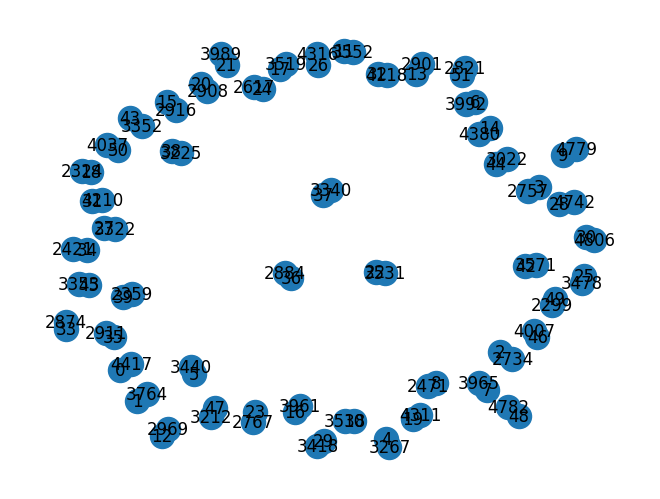

In [59]:
sub_pairs_graph = pairs_graph.subgraph(list(pairs_graph._node)[:100])
draw(sub_pairs_graph, with_labels = True)

In [39]:
graph_dict

{1: {3441},
 3: {3267},
 4: {3440},
 5: {3371, 4726},
 6: {3093},
 7: {3150, 3662},
 8: {2739},
 11: {4345},
 15: {3134},
 17: {3322},
 18: {2544},
 20: {3185},
 21: {4297},
 23: {3225, 4581},
 24: {3418, 3947},
 26: {3048, 3189, 3684, 4493, 4663},
 27: {3519},
 28: {2357, 2673, 2729, 3503, 3751, 4168, 4190, 4711},
 29: {2617, 4208},
 30: {2460, 2784},
 35: {3171, 4398},
 36: {3190},
 37: {2299, 2533},
 38: {2767},
 39: {4343},
 47: {4118},
 48: {2394},
 49: {3340},
 50: {3963, 3996},
 51: {3217, 3383},
 52: {4638},
 53: {3992},
 54: {4744},
 56: {4714},
 57: {2785, 2821, 4316},
 59: {4675},
 61: {4742},
 63: {3156, 3159},
 65: {4269, 4856},
 66: {3252, 3754},
 67: {3051, 4280},
 68: {4442},
 69: {3301, 3303, 3940, 4194, 4303, 4652, 4851},
 70: {3550, 3954, 4100, 4723},
 71: {2573, 2736, 2805, 4435},
 72: {3578, 4408},
 74: {2989, 3220},
 75: {3611, 4602},
 76: {3467},
 78: {3018, 3666},
 79: {3354},
 81: {4293},
 83: {4137},
 84: {3299, 4822},
 85: {3647, 4869},
 88: {2908},
 89: {396

<h2>Entity Clustering</h2>

In [40]:
from pyjedai.clustering import ConnectedComponentsClustering

In [60]:
ccc = ConnectedComponentsClustering()
clusters = ccc.process(pairs_graph)

In [42]:
def print_clusters(temp):
    for k in temp:
        l = list(k)
        for t in l:
            if t<len(d1):
                print(d1['title'][t],end='\n')
            else:
                print(d2['title'][t-len(d1)],end='\n')
        print("------------------------")

print_clusters(clusters)

a user-centered interface for querying distributed multimedia databases
networked data management design points
------------------------
xml-based information mediation with mix
the ccube constraint object-oriented database system
------------------------
active views for electronic commerce
the ccube constraint object-oriented database system
xml repository and active views demonstration
the cornell jaguar system: adding mobility to predator
client-site query extensions
------------------------
the cornell jaguar project: adding mobility to predator
cache conscious indexing for decision-support in main memory
serf: odmg-based generic re-structuring facility
mining deviants in a time series database
the aqua approximate query answering system
exploratory mining via constrained frequent set queries
evolvable view environment (eve): non-equivalent view maintenance under schema changes
phoenix: making applications robust
o-o, what's happening to db2?
mining deviants in a time series datab

In [63]:
eva = Evaluation(data)
eva.report(clusters)
#eva.confusion_matrix()

#  Evaluation 
---
Scores:
	Precision:     97.14% 
	Recall:        97.89%
	F1-score:      97.51%
Classification report:
	True positives: 2177
	False positives: 64
	True negatives: 6000993
	False negatives: 47
	Total comparisons: 2241
---


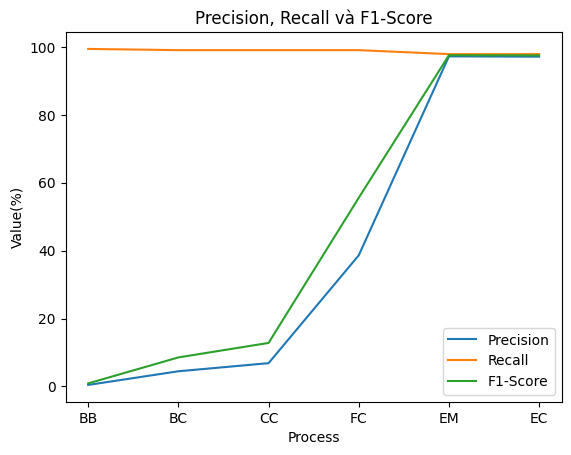

In [64]:
import matplotlib.pyplot as plt

s1 = [0.45,4.47,6.86,38.62,97.23,97.14]
s2 = [99.42,99.06,99.06,99.06,97.89,97.89]
s3 = [0.9,8.55,12.82,55.57,97.56,97.51]

x = ['BB', 'BC', 'CC', 'FC', 'EM', 'EC']

plt.plot(x, s1, label='Precision')
plt.plot(x, s2, label='Recall')
plt.plot(x, s3, label='F1-Score')


plt.title('Precision, Recall và F1-Score')
plt.xlabel('Process')
plt.ylabel('Value(%)')


plt.legend()


plt.show()
